In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
dfs =[]
for filename in os.listdir():
    if filename[-4:] != '.csv':
        continue
    
    file_df = pd.read_csv(filename)
    spl = filename[:-4].split('_')
    file_df['init_type'] = spl[1]
    file_df['instance'] = '_'.join(spl[2:])
    dfs.append(file_df)
df = pd.concat(dfs)
df.reset_index(inplace=True)
df.tail()

,index,id,cost,hd_time,ls_time,diversity,init_type,instance
3318,95,95,1396680.0,11.075,4.783,51.3084,unlimited,S2_g-6
3319,96,96,1396800.0,2.595,4.294,44.8718,unlimited,S2_g-6
3320,97,97,1401490.0,8.898,4.316,50.0615,unlimited,S2_g-6
3321,98,98,1402560.0,1.535,4.250,42.6677,unlimited,S2_g-6
3322,99,99,1403200.0,2.269,4.344,43.7039,unlimited,S2_g-6


In [38]:
instance_data = {
    'Beijing-6': 2561113,
    'Beijing-8': 3136727,
    'Hefei-10': 1748829,
    'K5_g-6': 3109473,
    'N5_g-5': 3325667,
    'O1_g-4': 2597731,
    'O1_p-2': 2146477,
    'S2_g-6': 1439140
}
df['gap'] = 0
df['total_time'] = df['ls_time'] + df['hd_time']
for i in df.index.values:
    df.loc[i, 'gap'] = df.loc[i, 'cost'] / instance_data[df.loc[i, 'instance']] - 1
    
df.head()

,index,id,cost,hd_time,ls_time,diversity,init_type,instance,gap,total_time
0,0,0,2703070.0,0.439,1.140,52.8837,hd,Beijing-6,0.055428,1.579
1,1,1,2706370.0,0.427,1.091,54.2946,hd,Beijing-6,0.056716,1.518
2,2,2,2711280.0,0.436,1.124,52.9147,hd,Beijing-6,0.058633,1.560
3,3,3,2711450.0,0.512,1.145,56.1705,hd,Beijing-6,0.058700,1.657
4,4,4,2711640.0,0.419,1.235,55.7519,hd,Beijing-6,0.058774,1.654


<AxesSubplot:xlabel='instance', ylabel='gap'>

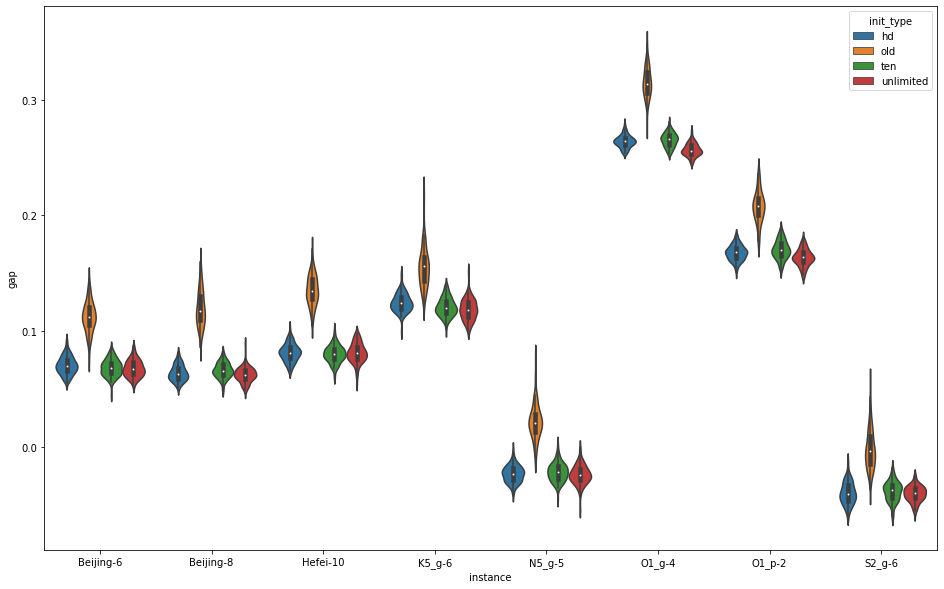

In [37]:
fig, ax = plt.subplots(figsize=(16,10))
sns.violinplot(data=df, x='instance', y='gap', hue='init_type', ax=ax)

<AxesSubplot:xlabel='instance', ylabel='diversity'>

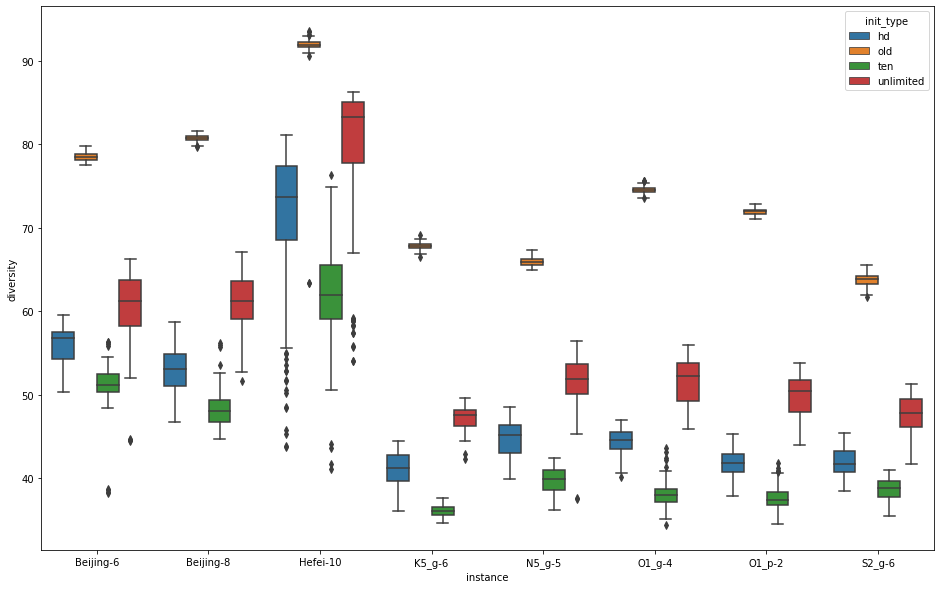

In [40]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(data=df, x='instance', y='diversity', hue='init_type', ax=ax)

<AxesSubplot:xlabel='instance', ylabel='total_time'>

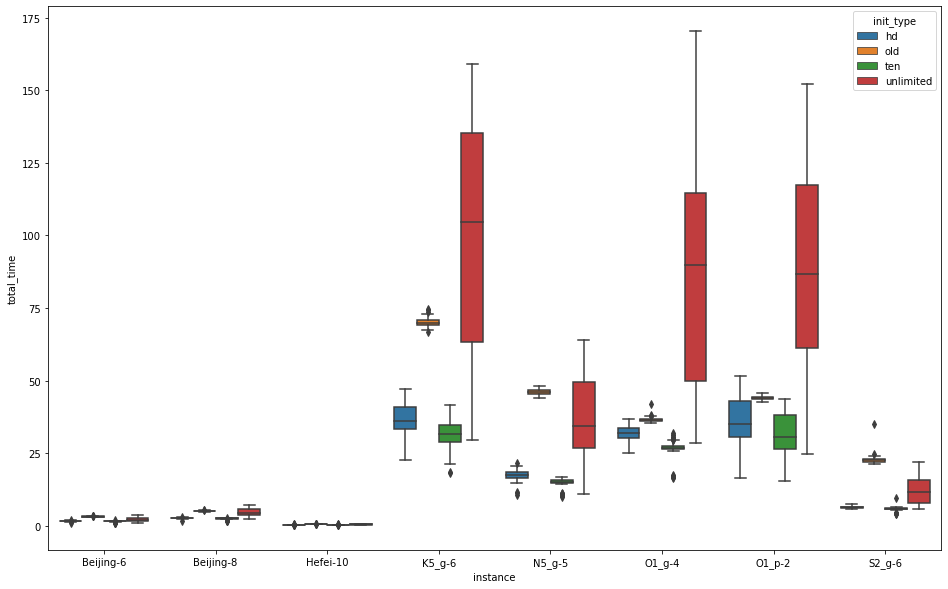

In [42]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(data=df, x='instance', y='total_time', hue='init_type', ax=ax)